
Бусько Полина  
polina_petrova_02@bk.ru

---

__Предмет__: Теория и Практика Численных Методов  


# Лабораторная работа №3.   

## Конечные элементы высоких порядков при решении уравнения конвекции-диффузии с переменными коэффициентами

__Due date:__ 2023.11.12 .  
__Date submitted:__ 2023.11.01




## Задание.  

Решить численно, методом конечных элементов с линейными базисными функциями, уравнение конвекции-диффузии с переменными коэффициентами:

$$ 
-\frac{d}{dx}\left( p(x) \frac{du}{dx} \right) + q(x) \cdot \frac{du}{dx} + r(x) \cdot u = f(x), 
\qquad
x \in (0, \pi).
$$

Коэффициенты и источниковый член уравнения имеют вид:

$$
  p(x) = (1+x)^2, \quad  q(x) = 2+x-x^2,  \quad r(x) = \frac{2x - 1}{4}, \quad  
  f(x) = (1+x)^2 + \frac{2x - 1}{4}.
$$

Найдите приближенное решение для случая граничных условий ниже:

$$
\begin{align}
u(x=0) & = 0 \\
p(x) \frac{du}{dx} {\Large\rvert_{x=\pi}} & = 0
\end{align}
$$

Общее решение уравнения:

$$
u(x) = \sqrt{1+x} \left( K_1 + K_2 e^{-x} \right) + \sin(x).
$$

Для заданных граничных условий, выражения для постоянных $K_1$ и $K_2$ принимают вид:
$$
 K_1 =  2 \frac{\sqrt{1 + \pi}} { (1 + e^{-\pi}  (1 + 2\pi))}, \quad 
 K_2 = -2 \frac{\sqrt{1 + \pi}} { (1 + e^{-\pi}  (1 + 2\pi))}
$$

   

## Решение


$$-\frac{d}{dx}\left( p(x) \frac{du}{dx} \right) + q(x) \cdot \frac{du}{dx} + r(x) \cdot u = f(x), 
\qquad
x \in (0, \pi).$$

Граничные условия: 
$$
\begin{align}
u(x=0) & = 0 \\
p(x) \frac{du}{dx} {\Large\rvert_{x=\pi}} & = 0
\end{align}
$$

Тогда полная постановка задачи имеет вид:

\begin{cases}
-\frac{d}{dx}\left( p(x) \frac{du}{dx} \right) + q(x) \cdot \frac{du}{dx} + r(x) \cdot u = f(x)\\
u(x=0)  = 0 \\
p(x) \frac{du}{dx} {\Large\rvert_{x=\pi}}  = 0
\end{cases}

Введем функцию $v(x): $
функция $v(x)$ интегрируема с квадратом, если существует $\displaystyle\int\limits_{a}^{b}(v(x))^2{dx};\quad v(x) \in L_2$

Введем понятия некоторые пространств:

Пространство $H^1([a,b]) = {v(x)\in L_2 : \displaystyle\int\limits_{a}^{b}(v'(x))^2}dx\quad$ существует и конечен

Пространство $H^1_E = {v(x) \in H^1 : v(x=a) = 0}$

Пространство $H^1_0 = {v \in H^1 : v(x=a) = 0}$

Домножим наше уравнение на на функцию $v$ из пространства $H^1_0$ и поинтегрируем по заданному отрезку

$$
\displaystyle\int\limits_{0}^{\pi}\bigg(-\frac{d}{dx}\left( p(x) \frac{du}{dx} \right) + q(x) \cdot \frac{du}{dx} + r(x) \cdot u\bigg) \cdot v(x)dx = \displaystyle\int\limits_{0}^{\pi}f(x) \cdot v(x) \quad \forall v \in H^1_0[0,\pi] 
$$

Проинтегрировав правую часть равенства по частям, получим:

$$
\big(-p(x) \cdot \frac{du}{dx} \cdot v \big)\bigg|_{0}^{\pi} + \displaystyle\int\limits_{0}^{\pi}\big(p(x)\frac{du}{dx}\frac{dv}{dx} + q(x)\frac{du}{dx}v + r(x)\cdot u\cdot v\big)dx = \displaystyle\int\limits_{0}^{\pi}f(x) \cdot vdx \quad \forall v \in H^1_0[0,\pi]
$$

$$
\big(-p(x) \cdot \frac{du}{dx} \cdot v \big)\bigg|_{0}^{\pi} = \big(-p(x) \cdot \frac{du}{dx} \cdot v \big)\bigg|_{\pi} - \big(-p(x) \cdot \frac{du}{dx} \cdot v \big)\bigg|_{0}
$$

$\big(-p(x) \cdot \frac{du}{dx} \cdot v \big)\bigg|_{\pi} = 0\quad$по условию

$\big(-p(x) \cdot \frac{du}{dx} \cdot v \big)\bigg|_{0} = 0\quad$так как $\quad v(0) = 0$

Тогда получаем: 

$$\displaystyle\int\limits_{0}^{\pi}\big(p(x)\frac{du}{dx}\frac{dv}{dx} + q(x)\frac{du}{dx}v + r(x)\cdot u\cdot v\big)dx = \displaystyle\int\limits_{0}^{\pi}f(x) \cdot v(x)dx$$

Это ослабленная постановка исходной задачи.

### Задание 1. Схема применеия элементов второго порядка
#### Зададим сетку.

Как и раньше будем рассматривать интервал, на котором определено уравнение: $x \in (0; \pi)$. В случае использования квадратичных базисных функций каждый элемент будет задействовать на один узел сетки больше, то есть по 3 узла сетки. Всего таких дополнительных узлов будет $N$, значит нвоое количество всех узлов $= 2N + 1$, причем $x_1 = a,\quad x_{2N+1} = b$.

Таким образом, элемент $k$ занимает интервал $x_{2k+1}<x<x_{2k+1}, k=1,2,...,N$. Еще одно условие: элемент $x_{2k}$ располагается в центре элемента $k$, то есть $x_{2k} = \frac12\cdot(x_{2k-1} + x_{2k+1})$
![рисунок 1](pictures_lab_3/pic_1.png)

#### Определим квадратичные базисные функции

Глобальные квадратичные базисные фукнции будем задавать через локальные базисные функции, определенные на каноническом элементе $0<X<1$
![рисунок 2](pictures_lab_3/pic_2.png)

$$
\varphi_{loc, 1}(X) = 2(1 - X)(\frac12 - X)\\
\varphi_{loc, 2}(X) = 4X(1 - X)\\
\varphi_{loc, 3}(X) = 2X(X - \frac12)
$$

Формула преобразования для элемента номер $k$:$\quad$ $x = X_{2k} + (X_{2k+2} - X_{2k})X$

Глобальные базисные функции на элементе с номером $k$ определяются следуюзим образом:

$$
\varphi_{2k}(X) = \varphi_{loc, 1} (X)\\
\varphi_{2k + 1}(X) = \varphi_{loc, 2} (X)\\
\varphi_{2k + 2}(X) = \varphi_{loc, 3} (X)
$$

Сделав замену в формуле преобразования локальные базисные функции можно записать через исходную переменную $x$. Тогда глобальные базисные функции примут вид:

$$
\varphi_{2k-1}(x) = \frac{(x_{2k}-x)(x_{2k+1}-x)}{(x_{2k}-x_{2k-1})(x_{2k+1}-x_{2k-1})},\\
\varphi_{2k}(x) = \frac{(x-x_{2k-1})(x_{2k+1}-x)}{(x_{2k}-x_{2k-1})(x_{2k+1}-x_{2k})},\\
\varphi_{2k+1}(x) = \frac{(x-x_{2k+1})(x-x_{2k})}{(x_{2k+1}-x_{2k+1})(x_{2k+1}-x_{2k})},\\
\varphi_{j}(x) = 0, \quad j\ne 2k-1, j\ne 2k, j \ne 2k+1
$$

#### Сборка
В качестве тестовых функций будем подставлять функции из базиса по очереди

$$
\sum_{j=1}^{2N+1}u_j\displaystyle\int\limits_{0}^{\pi}\bigg(p(x)\cdot\frac{d\varphi_j}{dx}\cdot\frac{d\varphi_i}{dx}+q(x)\cdot\frac{d\varphi_j}{dx}\varphi_i+r(x)\varphi_i\varphi_j\bigg)dx=\displaystyle\int\limits_{0}^{\pi}f(x)\varphi_idx
$$
$$
A_{i,j} = \displaystyle\int\limits_{0}^{\pi}\bigg(p(x)\cdot\frac{d\varphi_j}{dx}\cdot\frac{d\varphi_i}{dx}+q(x)\cdot\frac{d\varphi_j}{dx}\varphi_i+r(x)\varphi_i\varphi_j\bigg)dx
$$
$$
b_1 = 0\\
b_i = \displaystyle\int\limits_{0}^{\pi}f(x)\varphi_idx\\
b_{2N+1} = \displaystyle\int\limits_{0}^{\pi}f(x)\varphi_{2N+1}dx
$$

Так как элемент $k$ занимает область $x_{2k-1}<x<x_{2k+1}$, то можно записать:

$$
A_{i,j} = \sum_{k = 0}^{N - 1}\displaystyle\int\limits_{x_{2k-1}}^{x_{2k+1}}\bigg(p(x)\cdot\frac{d\varphi_j}{dx}\cdot\frac{d\varphi_i}{dx}+q(x)\cdot\frac{d\varphi_j}{dx}\varphi_i+r(x)\varphi_i\varphi_j\bigg)dx\\
b_i = \sum_{k = 0}^{N - 1}\displaystyle\int\limits_{x_{2k-1}}^{x_{2k+1}}f(x)\varphi_idx\\
b_{2N+1} = \sum_{k = 0}^{N - 1}\displaystyle\int\limits_{x_{2k-1}}^{x_{2k+1}}f(x)\varphi_{2N+1}dx
$$

Ненулевые базисные функции на элементе $k$ являются базисные функции: $\varphi_{2k-1}, \varphi{2k},\varphi_{2k+1}$, поэтому вклад от элемента $k$ в матрицу $A$ будет $A_{loc}$, размером 3x3, аналогично, размер вклада в вектор $b$ будет 3х1. Каждый из таких вкладов будем считать при помощи квадратур Гаусса.

$$
x = x_{2k-1} + hX, \quad 0\le X\le1\\
h = x_{2k+1} - x_{2k-1}
$$

$$
A_{loc i,j}^{(k)} = h\cdot\displaystyle\int\limits_{0}^{1}\bigg(p\frac{x_{2k-1} + hX}{h^2}\cdot \frac{\varphi_{loc j}(X)}{dX}\cdot \frac{\varphi_{loc i}(X)}{dX}+\frac{q(x_{2k-1} + hX)}{h}\frac{\varphi_{loc j}(X)}{dX}\varphi_{loc i}(X)+r(x_{2k-1} + hX)\varphi_{loc i}\cdot\varphi_{loc j}\bigg)dX, \quad i,j = 1,2,3\\
b_{loc i}^{(k)} = h\cdot\displaystyle\int\limits_{0}^{1}f(x_{2k-1} + hX)\cdot\varphi_{loc i}(X)dX, \quad i=1,2,3
$$


### Задание 2. Схема применеия элементов третьего порядка

#### Зададим сетку.

Как и раньше будем рассматривать интервал, на котором определено уравнение: $x \in (0; \pi)$. В случае использования кубических базисных функций каждый элемент будет задействовать на два узела сетки больше, чем в линейном случае, то есть по 4 узла сетки. Всего таких дополнительных узлов будет $2N$, значит нвоое количество всех узлов $= 3N + 1$, причем $x_1 = a,\quad x_{3N+1} = b$.

Так как внутренние ($2N$ дополнительных узлов) расположены по элементу равномерно, то имеем:
$$
x_{3k-1} = \frac13(2x_{3k-2} + x_{3k+1})\\
x_{3k} = \frac13(x_{3k-2} + 2x_{3k+1})
$$
![рисунок 3](pictures_lab_3/pic_3.png)

#### Определим кубические базисные функции

Глобальные кубические базисные фукнции будем задавать через локальные базисные функции, определенные на каноническом элементе $0<X<1$
![рисунок 4](pictures_lab_3/pic_4.png)
Так как элемент $k$ занимает область: $x_{3k-2}\le x \le x_{3k+1}$, то можем установить соответсвие между этим элементом и каноническим элементом с помощью замены переменной: $x = x_{3k-2} + (x_{3k+1} - x_{3k-2})X, \quad 0<X<1$

$$
\varphi_{loc, 1}(X) = \frac92(\frac13-X)(\frac23-X)(1-X)\\
\varphi_{loc, 2}(X) = \frac{27}{2}X(\frac23-X)(1-X)\\
\varphi_{loc, 3}(X) = \frac{27}{2}X(X-\frac13)(1-X)\\
\varphi_{loc, 4}(X) = \frac92 X(X-\frac13)(X-\frac23)
$$

Глобальные базисные функции на элементе с номером $k$ определяются следуюзим образом:

$$
\varphi_{3k - 2}(X) = \varphi_{loc, 1} (X)\\
\varphi_{3k - 1}(X) = \varphi_{loc, 2} (X)\\
\varphi_{3k}(X) = \varphi_{loc, 3} (X)\\
\varphi_{3k + 1}(X) = \varphi_{loc, 4} (X)
\varphi_{j}(X) = 0, \quad j\ne 3k-2, j\ne 3k-1, j\ne 3k, j\ne 3k+1
$$

Эти базисные функции удовлетворяют свойству:

$$
\varphi_j(x_i) = 
\begin{cases}
  1, \quad i = j\\
  0, \quad i\ne j
\end{cases}
$$

То есть, они равны единицы только на своем элементе

#### Сборка

В качестве тестовых функций будем подставлять функции из базиса по очереди

$$
\sum_{j=1}^{3N+1}u_j\displaystyle\int\limits_{0}^{\pi}\bigg(p(x)\cdot\frac{d\varphi_j}{dx}\cdot\frac{d\varphi_i}{dx}+q(x)\cdot\frac{d\varphi_j}{dx}\varphi_i+r(x)\varphi_i\varphi_j\bigg)dx=\displaystyle\int\limits_{0}^{\pi}f(x)\varphi_idx
$$
$$
A_{i,j} = \displaystyle\int\limits_{0}^{\pi}\bigg(p(x)\cdot\frac{d\varphi_j}{dx}\cdot\frac{d\varphi_i}{dx}+q(x)\cdot\frac{d\varphi_j}{dx}\varphi_i+r(x)\varphi_i\varphi_j\bigg)dx
$$
$$
b_1 = 0\\
b_i = \displaystyle\int\limits_{0}^{\pi}f(x)\varphi_idx\\
b_{3N+1} = \displaystyle\int\limits_{0}^{\pi}f(x)\varphi_{3N+1}dx
$$

Так как элемент $k$ занимает область $x_{3k-2}<x<x_{2k+1}$, то можно записать:

$$
A_{i,j} = \sum_{k = 0}^{N - 1}\displaystyle\int\limits_{x_{3k-2}}^{x_{3k+1}}\bigg(p(x)\cdot\frac{d\varphi_j}{dx}\cdot\frac{d\varphi_i}{dx}+q(x)\cdot\frac{d\varphi_j}{dx}\varphi_i+r(x)\varphi_i\varphi_j\bigg)dx\\
b_i = \sum_{k = 0}^{N - 1}\displaystyle\int\limits_{x_{3k-2}}^{x_{3k+1}}f(x)\varphi_idx\\
b_{2N+1} = \sum_{k = 0}^{N - 1}\displaystyle\int\limits_{x_{3k-2}}^{x_{3k+1}}f(x)\varphi_{2N+1}dx
$$

Ненулевые базисные функции на элементе $k$ являются базисные функции: $\varphi_{3k-2},\varphi_{3k-1}, \varphi_{3k},\varphi_{3k+1}$, поэтому вклад от элемента $k$ в матрицу $A$ будет $A_{loc}$, размером 4x4, аналогично, размер вклада в вектор $b$ будет 4х1. Каждый из таких вкладов будем считать при помощи квадратур Гаусса.

$$
x = x_{3k-2} + hX, \quad 0\le X\le1\\
h = x_{3k+1} - x_{3k-2}
$$

$$
A_{loc i,j}^{(k)} = h\cdot\displaystyle\int\limits_{0}^{1}\bigg(p\frac{x_{3k-2} + hX}{h^2}\cdot \frac{\varphi_{loc j}(X)}{dX}\cdot \frac{\varphi_{loc i}(X)}{dX}+\frac{q(x_{3k-2} + hX)}{h}\frac{\varphi_{loc j}(X)}{dX}\varphi_{loc i}(X)+r(x_{3k-2} + hX)\varphi_{loc i}\cdot\varphi_{loc j}\bigg)dX, \quad i,j = 1,2,3,4\\
b_{loc i}^{(k)} = h\cdot\displaystyle\int\limits_{0}^{1}f(x_{3k-2} + hX)\cdot\varphi_{loc i}(X)dX, \quad i=1,2,3,4
$$


### Задание 3

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
def defineFuncP(x):
    p = (1 + x) * (1 + x)
    return p
def defineFuncQ(x):
    q = 2 + x - x * x
    return q
def defineFuncR(x):
    r = (2 * x - 1) / 4
    return r
def defineFuncF(x):
    f = (1 + x) * (1 + x) + (2 * x - 1) / 4
    return f

In [127]:
def functionSolvKvadr(x_element_bord, N, start, end):
    
    A = np.zeros((2*N+1,2*N+1))
    b = np.zeros(2*N+1)

    x = np.zeros(2*N + 1)
    
    i = 0
    index = 0
    for i in range (N + 1):
        x[index] = x_element_bord[i]
        index = index + 2

    i = 0
    for i in range (2*N + 1):
        if (x[i] == 0):
            x[i] = 0.5 * (x[i-1]+x[i+1])
            
    x[0] = start
    
    M = 3
    GaussQWeight = [5/18, 4/9, 5/18]
    GaussQPoint = [1/2 * (1 - math.sqrt(3/5)), 1/2, 1/2 * (1 + math.sqrt(3/5))];
    
    
    for k in range(N):
        h = x[2 *k + 1] - x[2 * k - 1]
        A_loc = np.zeros((3, 3))
        b_loc = np.zeros(3)
        
        # Цикл по квадратуре Гаусса
        for m in range (M):
            X = GaussQPoint[m]
            phi_loc = [2 * (1 - X) * (0.5 - X), 4 * X * (1 - X), 2 * X * (X - 0.5)]
            phi_locPr = [4 * X - 3, 4 - 8 * X, 4 * X - 1]
            
            valueP = defineFuncP(x[2 * k - 1] + h * X)
            valueQ = defineFuncQ(x[2 * k - 1] + h * X)
            valueR = defineFuncR(x[2 * k - 1] + h * X)
            valueF = defineFuncF(x[2 * k - 1] + h * X)
            
            for i in range (3):
                for j in range (3):
                    A_loc[i][j] = A_loc[i][j] + h * GaussQWeight[m] * ((valueP) / (h * h) * phi_locPr[i] * phi_locPr[j] +
                    valueQ / h * phi_loc[i] * phi_locPr[j] + valueR * phi_loc[i] * phi_loc[j])
                b_loc[i] = b_loc[i] + h* GaussQWeight[m] * valueF * phi_loc[i]
        
        A[2*k:2*k+1+1+1,2*k:2*k+1+1+1] += A_loc
        b[2*k:2*k+1+1+1] += b_loc

    A[0,:] = 0; A[0,0] = 1; b[0] = 0 
    b[N] = 0
    
    U = np.linalg.solve(A,b)
    
    #print (A)
    #print (b)
    return U, x


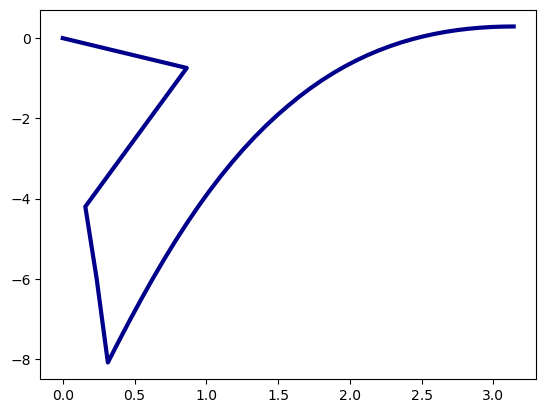

In [128]:
start = 0
end = math.pi
N = 20

x_e_b = np.linspace(start, end, N + 1)
U, x = functionSolvKvadr(x_e_b, N, start, end)
#print (x)
#print (U)

plt.plot(x, U, linewidth = 3, color = "darkblue")
plt.show()



Интегралы считаются методом квадратур Гаусса с использованием трех точек. Это будет удобно, так как функции $p(x),\quad q(x), \quad r(x)$ заданы полиномами. Максимальная степень среду них - квадрат. Интеграл от полинома степени $2M+1$ вычисляется точно. ($M$ - количество точек вычисления). То есть, можно пользоваться квадратурой с меньшим количеством точек.

### Задание 4

In [139]:
def functionSolvKub(x_element_bord, N, start, end):
    
    A = np.zeros((3*N+1,3*N+1))
    b = np.zeros(3*N+1)

    x = np.zeros(3*N + 1)
    
    i = 0
    index = 0
    for i in range (N + 1):
        x[index] = x_element_bord[i]
        index = index + 3

    i = 0
    for i in range (3*N + 1):
        if (x[i] == 0):
            x[i] = 1/3 * (2 * x[i-1]+x[i+2])
            x[i+1] = 1/3 * (x[i-2]+x[i+1])
            
    x[0] = start
    
    M = 3
    GaussQWeight = [5/18, 4/9, 5/18]
    GaussQPoint = [1/2 * (1 - math.sqrt(3/5)), 1/2, 1/2 * (1 + math.sqrt(3/5))];
    


    for k in range(N):
        h = x[3 *k + 1] - x[3 * k - 2]
        A_loc = np.zeros((4, 4))
        b_loc = np.zeros(4)
        
        # Цикл по квадратуре Гаусса
        for m in range (M):
            X = GaussQPoint[m]
            phi_loc = [9/2*(1/3-X)*(2/3-X)*(1-X), 27/2*X*(2/3-X)*(1-X),27/2*X*(X-1/3)*(1-X), 9/2*X*(X-1/3)*(X-2/3)]
            phi_locPr = [9/2*((1/3-X) * (2*X-5/3)-(2/3-X)*(1-X)), 27/2*((1-2*X)*(2/3-X)-(1-X)*X), 27/2*((1-X)*(2*X-1/3)*(X-1/3)*X), 9/2*((X-2/3)*(2*X-1/3)+(X-1/3)*X)]
            
            valueP = defineFuncP(x[3 * k - 2] + h * X)
            valueQ = defineFuncQ(x[3 * k - 2] + h * X)
            valueR = defineFuncR(x[3 * k - 2] + h * X)
            valueF = defineFuncF(x[3 * k - 2] + h * X)
            
            for i in range (4):
                for j in range (4):
                    A_loc[i][j] = A_loc[i][j] + h * GaussQWeight[m] * ((valueP) / (h * h) * phi_locPr[i] * phi_locPr[j] +
                    valueQ / h * phi_loc[i] * phi_locPr[j] + valueR * phi_loc[i] * phi_loc[j])
                b_loc[i] = b_loc[i] + h* GaussQWeight[m] * valueF * phi_loc[i]
        
        A[3*k - 2:3*k+1+1+1,3*k - 2:3*k+1+1+1] += A_loc
        b[3*k - 2:3*k+1+1+1] += b_loc

    A[0,:] = 0; A[0,0] = 1; b[0] = 0 
    b[N] = 0
    
    U = np.linalg.solve(A,b)
    
    #print (A)
    #print (b)
    return U, x


In [140]:
start = 0
end = math.pi
N = 20

x_e_b = np.linspace(start, end, N + 1)
U, x = functionSolvKub(x_e_b, N, start, end)
#print (x)
#print (U)

plt.plot(x, U, linewidth = 3, color = "darkblue")
plt.show()


ValueError: operands could not be broadcast together with shapes (0,0) (4,4) (0,0) 

### Задание 5

In [132]:
start = 0
end = math.pi

In [133]:
N = 20


xkv_bord = np.linspace(start, end, N + 1)
Ukv, xkv = functionSolvKvadr(xkv_bord, N, start, end)
#plt.plot(xr, Ur, linewidth = 3, color = "darkblue")


xkub = np.linspace(start, end, N + 1)
Un, xn = functionSolvKub(xkub, N, start, end)
#plt.plot(xn, Un, linewidth = 3, color = "lime")


LinAlgError: Singular matrix

### Выводы

В данной лаборатрной рабтое приведены выкладки для использования базисных функций второго и третьего порядков, а так же произведена программная реализация их использования.

### Литература

1. Whiteley J. Finite element methods //A Practical Guide. – 2014. – Т. 1.